In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('AB_Test_Results.xlsx')

c:\Users\Mariia\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [8]:
df.shape


(10000, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [10]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [11]:
df[df['VARIANT_NAME']=='variant'].describe()

,USER_ID,REVENUE
count,5016.000000,5016.000000
mean,4972.776914,0.070070
std,2876.320625,1.314802
min,3.000000,0.000000
25%,2476.500000,0.000000
50%,4958.500000,0.000000
75%,7415.250000,0.000000
max,10000.000000,58.630000


In [12]:
df[df['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,4984.000000,4984.000000
mean,4989.436798,0.129013
std,2905.145109,3.007524
min,2.000000,0.000000
25%,2466.000000,0.000000
50%,4964.500000,0.000000
75%,7576.250000,0.000000
max,10000.000000,196.010000


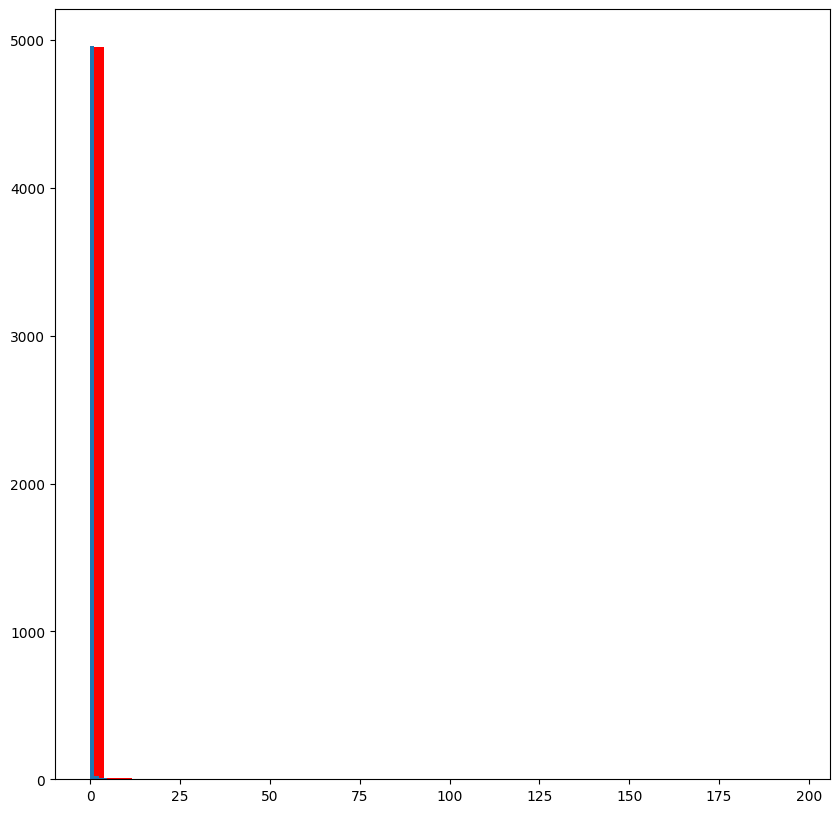

In [15]:
plt.figure(figsize=(10, 10))
control_visit_all = df['REVENUE'][df['VARIANT_NAME']=='control']
test_visit_all =df['REVENUE'][df['VARIANT_NAME']=='variant']


plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all,  bins=50)


plt.show()

In [20]:
from scipy.stats import mannwhitneyu
# mw_stats = mannwhitneyu(x=df[(df['VARIANT_NAME'] == 'control')&(df['purchase'] == 1)]['revenue'].values,
#                                                   y=df[(df['VARIANT_NAME'] == 'variant')&(df['purchase'] == 1)]['revenue'].values)

# mw_stats
control_revenue = df[df['VARIANT_NAME'] == 'control']['REVENUE'].values
variant_revenue = df[df['VARIANT_NAME'] == 'variant']['REVENUE'].values

mw_stats = mannwhitneyu(x=control_revenue, y=variant_revenue)
print(mw_stats)

MannwhitneyuResult(statistic=12521564.0, pvalue=0.47825247965294926)


В общем, результаты теста Манна-Уитни не дают оснований для отклонения нулевой гипотезы о том, что медианы доходов в обеих группах равны. В нашем конкретном контексте это может означать, что изменение, внесенное вариантом ('variant'), не приводит к статистически значимым различиям в доходах по сравнению с контрольной группой ('control').

Значит, гипотеза не подтвердилась. Оставляем вариант "А".